## Cost Profit Analysis

## A machine learning project on profit increment for a food delivery company.

In [764]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [765]:
data = pd.read_csv(r"C:\Users\Aditya Malviya\Downloads\food_orders_new_delhi.csv")
data

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [767]:
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [768]:
customer_counts = data['Customer ID'].value_counts()
customer_counts

Customer ID
C7938    3
C7949    3
C6486    2
C7190    2
C6977    2
        ..
C8509    1
C4854    1
C3491    1
C4124    1
C4335    1
Name: count, Length: 947, dtype: int64

In [769]:
from collections import Counter
customer_counts_by_frequency = Counter(customer_counts)
customer_counts_by_frequency

Counter({1: 896, 2: 49, 3: 2})

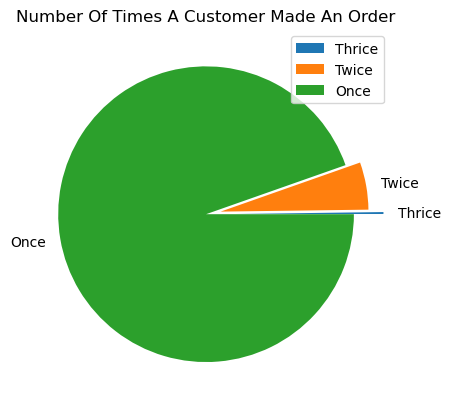

In [770]:
plt.pie(x =customer_counts_by_frequency.values(), labels = ['Thrice', 'Twice', 'Once'], explode = [0.2, 0.1, 0])
plt.title('Number Of Times A Customer Made An Order')
plt.legend()
plt.show()

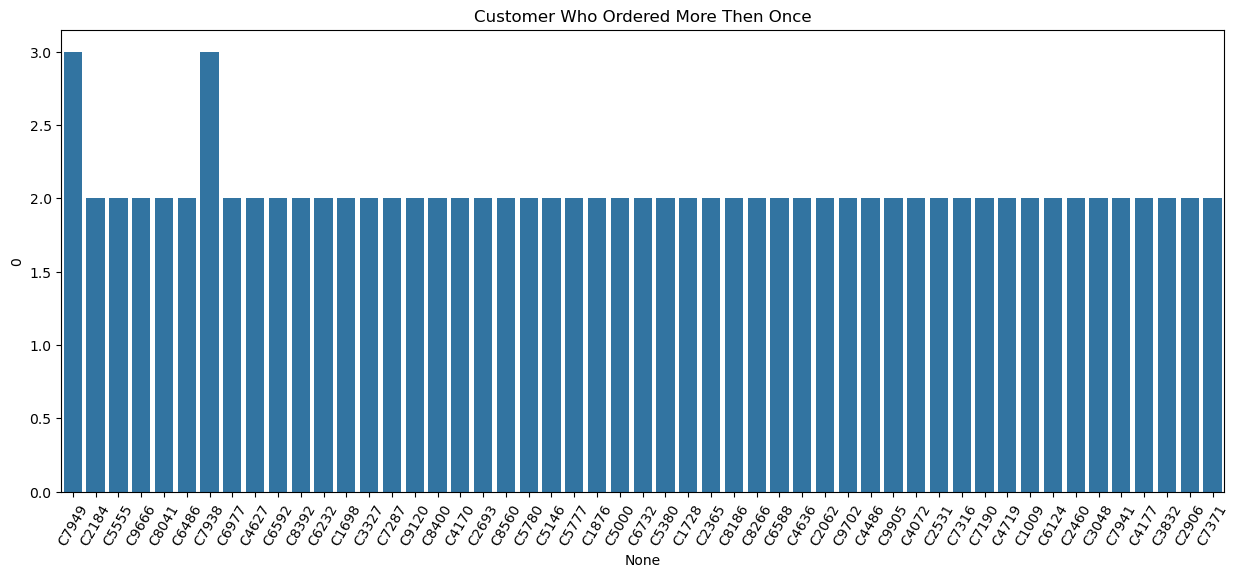

In [771]:
customers = {}
for i, j in Counter(data['Customer ID']).items():
    if j > 1:
        customers[i] = j

x = pd.DataFrame(customers.values(), index = customers.keys())

plt.figure(figsize = (15, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Customer Who Ordered More Then Once')
plt.xticks(rotation = 60)
plt.show()

In [772]:
restaurant_counts = data['Restaurant ID'].value_counts()

restaurant_counts_by_frequency = Counter(restaurant_counts)
restaurant_counts_by_frequency

Counter({1: 348, 2: 196, 3: 55, 4: 16, 5: 5, 6: 1})

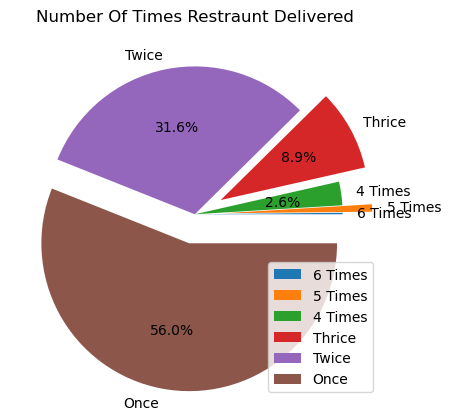

In [773]:
def my_autopct (pct):
    return f'{pct:.1f}%' if pct > 2 else ''

plt.pie(x = restaurant_counts_by_frequency.values(), autopct = my_autopct, 
        labels = ['Once', 'Twice', 'Thrice', '4 Times', '5 Times', '6 Times'][::-1], 
        explode = [0, 0.2, 0, 0.2, 0, 0.2])
plt.title('Number Of Times Restraunt Delivered')
plt.legend(loc = 'lower right')
plt.show()

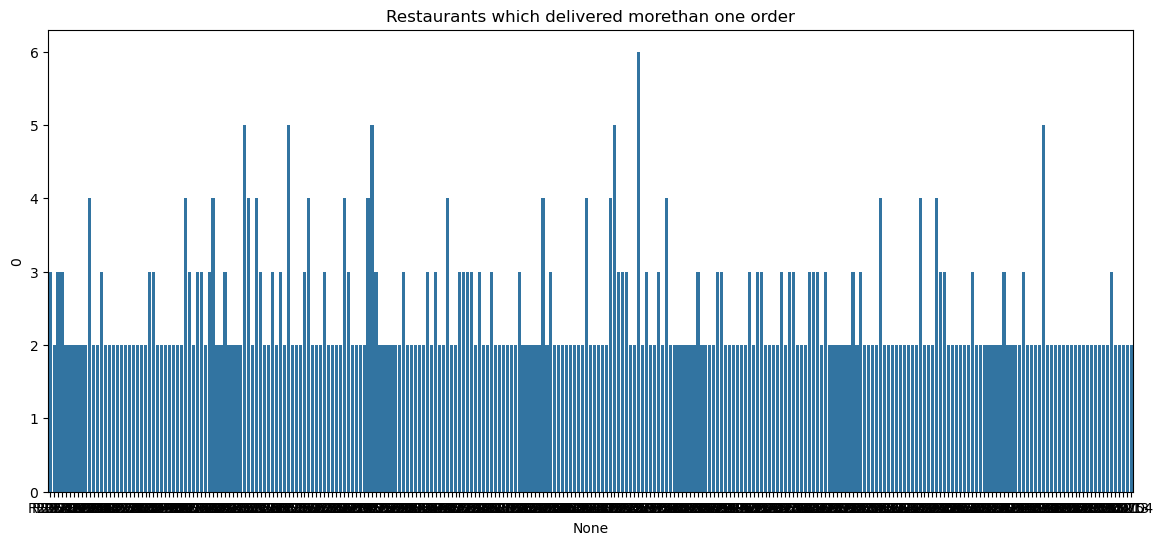

In [774]:
rwmtoo = data[data['Restaurant ID'].duplicated()] ['Restaurant ID']

corwmtoo = Counter(data['Restaurant ID'])

restaurants = {}
for i, j in corwmtoo.items():
    if j > 1:
        restaurants[i] = j

x = pd.DataFrame(restaurants.values(), index=restaurants.keys())

plt.figure(figsize = (14, 6))
sns.barplot(x = x.index, y = x[0])
plt.title('Restaurants which delivered morethan one order')
plt.show()

In [775]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])

data['Order Month'] = data['Order Date and Time'].dt.month_name()
data['Order Time'] = data['Order Date and Time'].dt.hour
data.drop(columns = 'Order Date and Time', inplace = True)

def food_time(time):
    if time >= 0 and time < 6: 
        return 'mid-night meal'
    elif time >=6 and time < 12: 
        return 'breakfast'
    elif time >= 12 and time < 20: 
        return 'lunch'
    else:
        return 'dinner'

data['Meal'] = data['Order Time'].apply(food_time)
data.drop(columns='Order Time', inplace=True)

data.head()

,Order ID,Customer ID,Restaurant ID,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal
0,1,C8270,R2924,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,February,mid-night meal
1,2,C1860,R2054,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,February,dinner
2,3,C6390,R2870,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,January,mid-night meal
3,4,C6191,R2642,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,January,dinner
4,5,C6734,R2799,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,January,mid-night meal


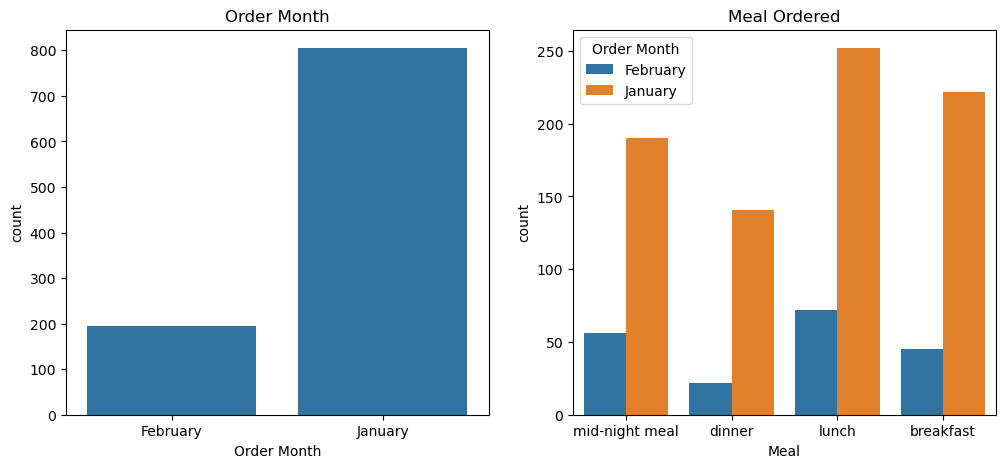

In [776]:
plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Order Month', data = data)
plt.title('Order Month')
plt.subplot(1, 2, 2)
sns.countplot(x = 'Meal', data = data, hue = 'Order Month') 
plt.title('Meal Ordered')
plt.show()

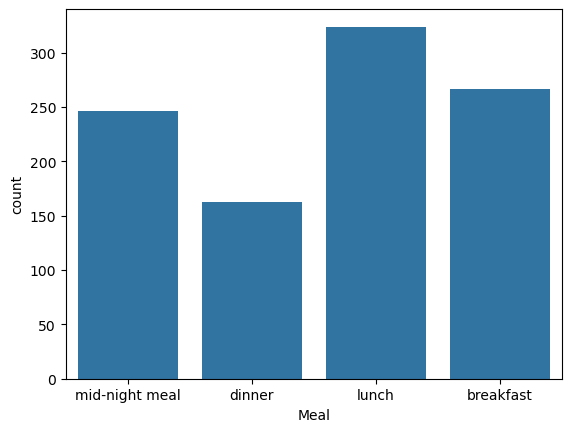

In [777]:
sns.countplot(x = 'Meal', data = data)
plt.show()

In [778]:
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])

In [779]:
data['Delivery Day'] = data['Delivery Date and Time'].dt.day_name() 
data.drop(columns = 'Delivery Date and Time', inplace = True)

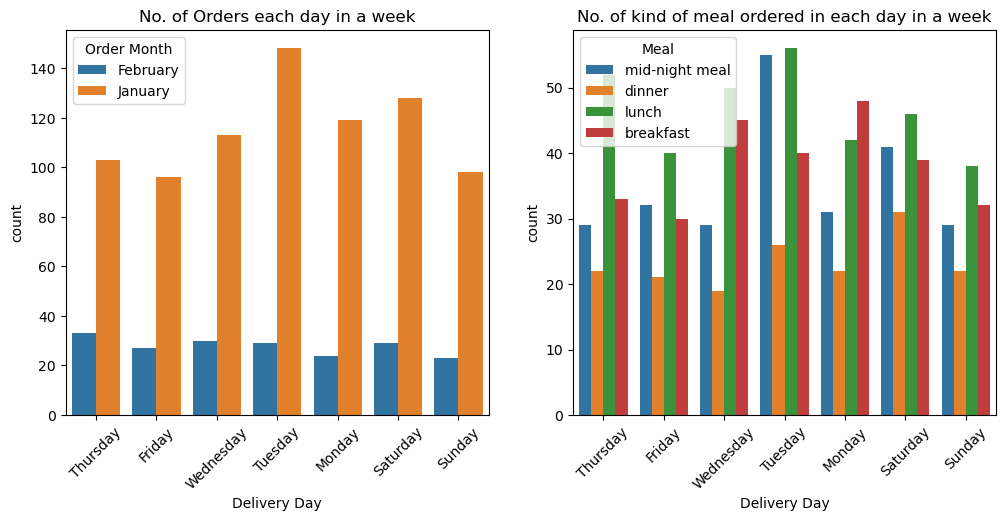

In [780]:
plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1) 
sns.countplot(x = 'Delivery Day', data = data, hue = 'Order Month') 
plt.title('No. of Orders each day in a week')
plt.xticks (rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(x= 'Delivery Day', data = data, hue = "Meal") 
plt.title('No. of kind of meal ordered in each day in a week') 
plt.xticks(rotation = 45)
plt.show()

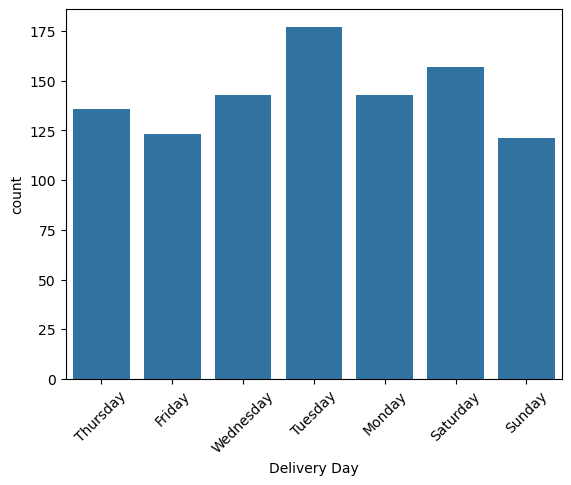

In [781]:
sns.countplot(x = data['Delivery Day'])
plt.xticks(rotation = 45)
plt.show()

In [782]:
data['Order Value'].describe()

count    1000.000000
mean     1053.969000
std       530.975339
min       104.000000
25%       597.750000
50%      1038.500000
75%      1494.000000
max      1995.000000
Name: Order Value, dtype: float64

In [783]:
import warnings

warnings.filterwarnings('ignore')

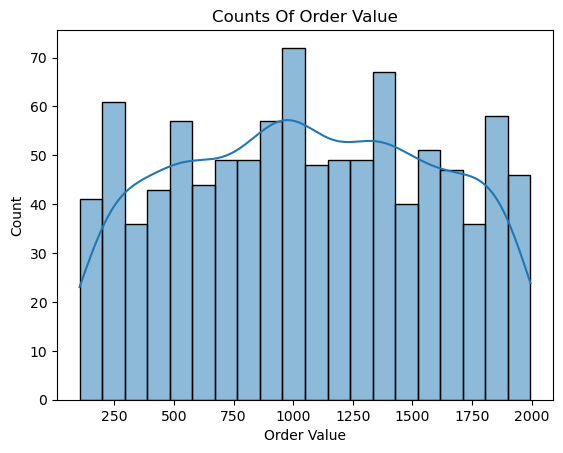

In [784]:
sns.histplot(x = 'Order Value', data = data, bins = 20, kde = True)
plt.title('Counts Of Order Value')
plt.show()

In [785]:
data['Delivery Fee'].describe()

count    1000.000000
mean       28.620000
std        16.958278
min         0.000000
25%        20.000000
50%        30.000000
75%        40.000000
max        50.000000
Name: Delivery Fee, dtype: float64

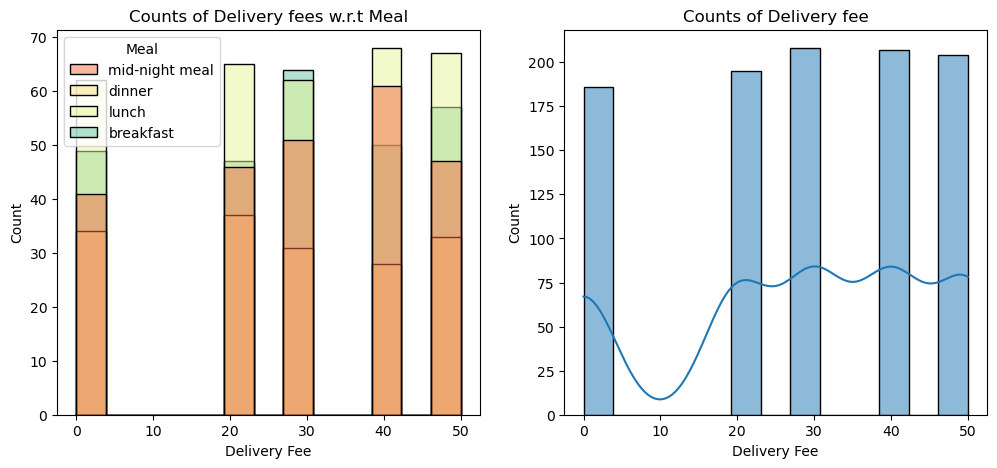

In [786]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = 'Delivery Fee', data = data, hue = 'Meal', palette = 'Spectral')
plt.title('Counts of Delivery fees w.r.t Meal')

plt.subplot(1, 2, 2)
sns.histplot(x = 'Delivery Fee', data = data, kde = True)
plt.title('Counts of Delivery fee')
plt.show()

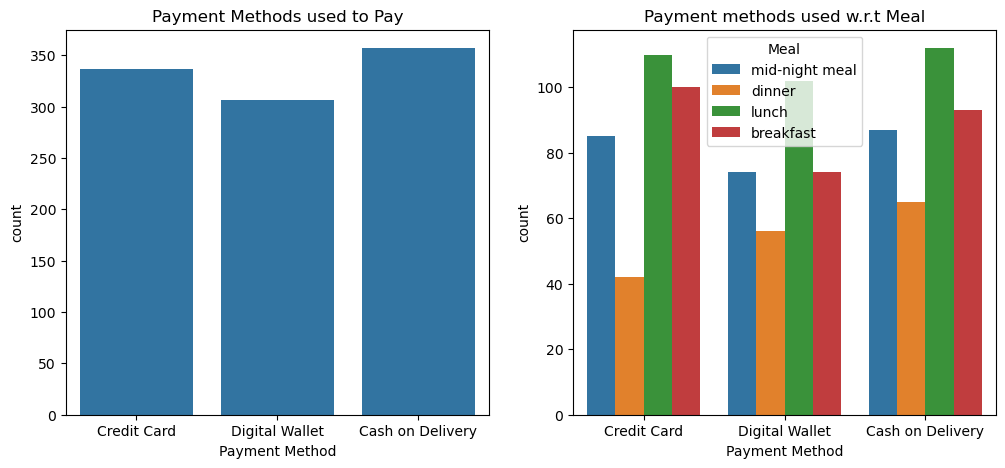

In [787]:
plt.subplots(1, 2, figsize = (12, 5)) 
plt.subplot(1, 2, 1)
sns.countplot(x = 'Payment Method', data = data) 
plt.title('Payment Methods used to Pay')
plt.subplot(1, 2, 2)
sns.countplot(x = 'Payment Method', data = data, hue = 'Meal') 
plt.title('Payment methods used w.r.t Meal')
plt.show()

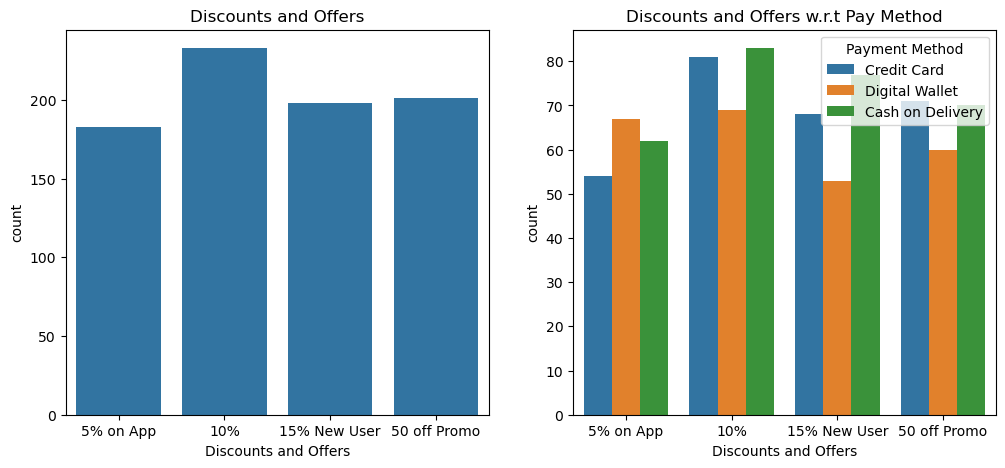

In [788]:
plt.subplots(1, 2, figsize = (12, 5)) 
plt.subplot(1, 2, 1) 
sns.countplot(x = 'Discounts and Offers', data = data) 
plt.title('Discounts and Offers')
plt.subplot(1, 2, 2)
sns.countplot(x = 'Discounts and Offers', data = data, hue = 'Payment Method')
plt.title('Discounts and Offers w.r.t Pay Method')
plt.show()

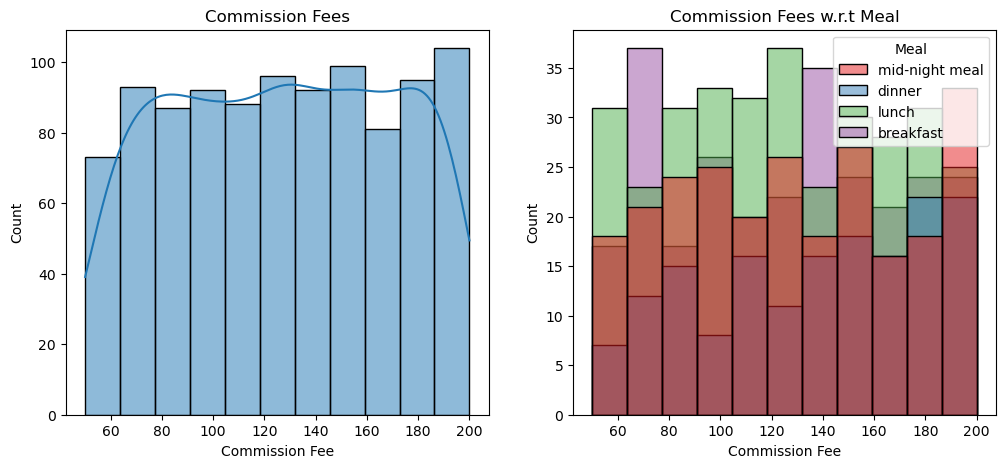

In [789]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1) 
sns.histplot(x = 'Commission Fee', data = data, kde = True) 
plt.title('Commission Fees')
plt.subplot(1, 2, 2) 
sns.histplot(x = 'Commission Fee', data = data, hue = "Meal", palette='Set1') 
plt.title('Commission Fees w.r.t Meal')
plt.show()

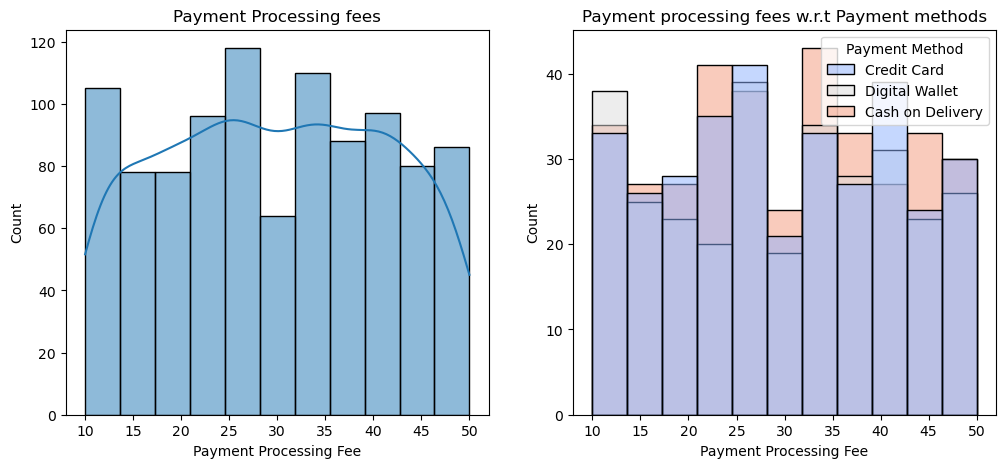

In [790]:
plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x = 'Payment Processing Fee', data = data, kde = True) 
plt.title('Payment Processing fees')
plt.subplot(1, 2, 2)
sns.histplot(x = "Payment Processing Fee", data = data, hue = 'Payment Method', palette = 'coolwarm') 
plt.title('Payment processing fees w.r.t Payment methods')
plt.show()

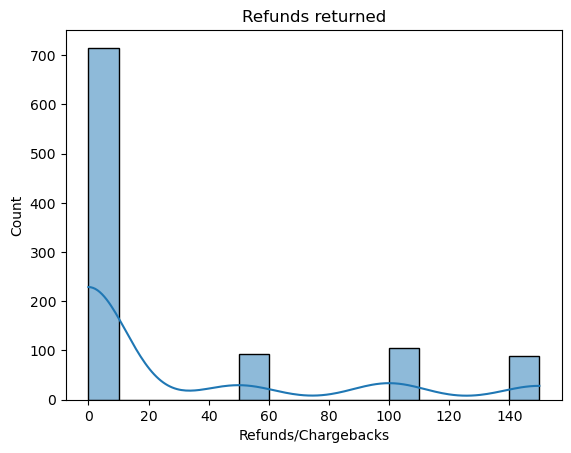

In [791]:
sns.histplot(x = 'Refunds/Chargebacks', data = data, kde = True)
plt.title('Refunds returned')
plt.show()

In [792]:
total_orders = data[data['Refunds/Chargebacks']> 0]['Refunds/Chargebacks']
percentage_of_orders = len(total_orders)/1000*100
percentage_of_orders

28.499999999999996

In [793]:
#Finding Discounts
data.fillna('0', inplace=True)
data['Discounts and Offers'] = data['Discounts and Offers'].apply(lambda x: x.split()[0])
data['Discounts and Offers'] = pd.Series(zip(data['Order Value'], data['Discounts and Offers']))

In [794]:
def Discount (tuple):
    order_value, discount_value = tuple
    if discount_value.endswith('%'):
        return order_value * int(discount_value.split('%')[0])/100
    else:
        return int(discount_value)

In [795]:
data['Discounts and Offers'] = data['Discounts and Offers'].apply(Discount)
data['Profit'] = data['Order Value'] - (data['Delivery Fee'] + data['Commission Fee'] + data[ 'Payment Processing Fee'])
data.head()

,Order ID,Customer ID,Restaurant ID,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Month,Meal,Delivery Day,Profit
0,1,C8270,R2924,1914,0,Credit Card,95.70,150,47,0,February,mid-night meal,Thursday,1717
1,2,C1860,R2054,986,40,Digital Wallet,98.60,198,23,0,February,dinner,Friday,725
2,3,C6390,R2870,937,30,Cash on Delivery,140.55,195,45,0,January,mid-night meal,Wednesday,667
3,4,C6191,R2642,1463,50,Cash on Delivery,0.00,146,27,0,January,dinner,Tuesday,1240
4,5,C6734,R2799,1992,30,Cash on Delivery,50.00,130,50,0,January,mid-night meal,Monday,1782


## Insights from the EDA

In [ ]:
#1. Customer Ordering Behavior: 
#- 1.5% of customers have ordered food more than once → They should be encouraged to order more.  
#- 94.6% of customers have ordered only once → The model should recommend strategies to increase repeat orders.  
#2. Restaurant Ordering Behavior:
#- 44% of restaurants have delivered food more than once → Their food should be recommended.  
#- 12.4% of restaurants have delivered food more than twice → These restaurants are popular and should be prioritized.  
#- 3.5% of restaurants have delivered food more than thrice → They provide good food and should be highly recommended.  
#3. Meal Preferences (Order Timing): Customers prefer meals in this order: Lunch > Breakfast > Mid-night Meal > Dinner
#4. Order Trends Based on Days of the Week: Food is ordered most on these days: Tuesday > Saturday > Monday, Wednesday > Thursday > Friday > Sunday
#5. Food Cost Preferences: Customers typically order food when the cost is between ₹250 and ₹1800.  
#6. Delivery Fee Trends: Delivery fee is earned more during these meals: Mid-night Meal > Dinner > Lunch > Breakfast  
#7. Payment Methods Preference: Customers prefer payment methods in this order: Cash on Delivery > Credit Card > Digital Wallet  
#8. Offers and Discounts Usage: Most frequently used discounts and offers: 10% off > ₹50 promo > 15% off > 5% app discount  
#9. Commission Fee Influence on Orders: Customers placed more orders when the commission fee was between ₹60 and ₹180.  
#10. Processing Fee Influence on Orders: Customers placed more orders when the processing fee was between ₹13 and ₹43.  
#11. Refunds and Chargebacks Impact: 28.5% of customers continue to order even after experiencing a refund or chargeback.  

## Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [843]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns=['Customer ID', 'Restaurant ID', 'Order Month', 'Profit']), 
    data['Profit'], test_size=.2, random_state=70)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 10), (200, 10), (800,), (200,))

In [845]:
data.describe()

,Order ID,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,74.289850,126.99000,29.832000,28.300000,868.527000
std,288.819436,530.975339,16.958278,68.688494,43.06405,11.627165,49.614228,535.970333
min,1.000000,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000,-163.000000
25%,250.750000,597.750000,20.000000,26.837500,90.00000,20.000000,0.000000,421.500000
50%,500.500000,1038.500000,30.000000,50.000000,127.00000,30.000000,0.000000,865.000000
75%,750.250000,1494.000000,40.000000,101.100000,164.00000,40.000000,50.000000,1312.750000
max,1000.000000,1995.000000,50.000000,299.250000,200.00000,50.000000,150.000000,1901.000000


In [847]:
ct = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), 
     ['Order Value', 'Delivery Fee', 'Discounts and Offers', 'Commission Fee', 
      'Payment Processing Fee', 'Refunds/Chargebacks']),  # Removed 'Profit' and 'Order ID'
    
    ('encoder', OrdinalEncoder(categories=[
        ['Cash on Delivery', 'Credit Card', 'Digital Wallet'],  # Payment Method
        ['lunch', 'breakfast', 'mid-night meal', 'dinner'],  # Meal
        ['Tuesday', 'Saturday', 'Monday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']  # Delivery Day
    ]), ['Payment Method', 'Meal', 'Delivery Day'])  
], remainder='passthrough', sparse_threshold=0)

x_train, x_test, y_train, y_test = train_test_split(
    data.drop(columns=['Customer ID', 'Restaurant ID', 'Order Month', 'Profit', 'Order ID']),  # Removed 'Order ID'
    data['Profit'], test_size=.2, random_state=70
)

In [849]:
pipe = Pipeline([
    ('transformer', ct), 
    ('model', LinearRegression())])

pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Order Value',
                                                   'Delivery Fee',
                                                   'Discounts and Offers',
                                                   'Commission Fee',
                                                   'Payment Processing Fee',
                                                   'Refunds/Chargebacks']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Cash '
                                                                              'on '
                                                                              'Delivery',
                                                                              'Credit '
                                                                              'Card',
                                                                              'Digital '
                                                                              'Wallet'],
                                                                             ['lunch',
                                                                              'breakfast',
                                                                              'mid-night '
                                                                              'meal',
                                                                              'dinner'],
                                                                             ['Tuesday',
                                                                              'Saturday',
                                                                              'Monday',
                                                                              'Wednesday',
                                                                              'Thursday',
                                                                              'Friday',
                                                                              'Sunday']]),
                                                  ['Payment Method', 'Meal',
                                                   'Delivery Day'])])),
                ('model', LinearRegression())])

In [851]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Order Value',
                                                   'Delivery Fee',
                                                   'Discounts and Offers',
                                                   'Commission Fee',
                                                   'Payment Processing Fee',
                                                   'Refunds/Chargebacks']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Cash '
                                                                              'on '
                                                                              'Delivery',
                                                                              'Credit '
                                                                              'Card',
                                                                              'Digital '
                                                                              'Wallet'],
                                                                             ['lunch',
                                                                              'breakfast',
                                                                              'mid-night '
                                                                              'meal',
                                                                              'dinner'],
                                                                             ['Tuesday',
                                                                              'Saturday',
                                                                              'Monday',
                                                                              'Wednesday',
                                                                              'Thursday',
                                                                              'Friday',
                                                                              'Sunday']]),
                                                  ['Payment Method', 'Meal',
                                                   'Delivery Day'])])),
                ('model', LinearRegression())])

In [861]:
y_pred = pipe.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R-squared Score: 1.0000
Mean Squared Error: 0.0000


In [857]:
costs = {
    'Order Value': [1981, 832],
    'Delivery Fee': [0, 50],
    'Payment Method': ['Digital Wallet', 'Credit Card'],
    'Discounts and Offers': [198.10, 124.80],
    'Commission Fee': [61, 106], 
    'Payment Processing Fee': [45, 36],
    'Refunds/Chargebacks': [0, 0],
    'Meal': ['breakfast', 'breakfast'],
    'Delivery Day': ['Saturday', 'Wednesday']
}

costs_df = pd.DataFrame(costs)
predicted_profit = pipe.predict(costs_df)

print('Predicted Profit:', predicted_profit)

Predicted Profit: [1875.  640.]
